This is a notebook to play around with the logistic regression class that I implemented and that can be found in this same folder

First, let's import some packages that I will use later on

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

For testing, I will use the IRIS dataset

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris['data']
y = iris['target']

It contains 150 examples, each described by 4 features

In [4]:
X.shape

(150, 4)

and labelled according to 3 classes

In [5]:
np.unique(y)

array([0, 1, 2])

For playing, I will see how my class can identify examples with label '2'.Thus, I create a new array where only those example labeles with '2' are idetified as 1's,and the rest as 0's

In [6]:
y2 = np.where(y==2,1,0)

Let's have a look

In [7]:
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

I will divide the dataset into train and test sets making use of the sklear method train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=1, stratify=y)

I will also use the sklearn method to normalize the data

In [9]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Letś first check how the sklear method for Linear Regression (without regularization, C=1) performs

In [10]:
lr = LogisticRegression(C=1, solver='lbfgs', random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred = lr.predict(X_test_std)

In [12]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


98% accuracy!

Letś check how the class I implemented performs. First, I create a model (instance of the class)

In [13]:
from logisticRegression import *
myModel=LogisticRegressionModel(4)

In my implementation, the feature matrices must have a shape of (number of feature, number of examples), and the label vectors a shape of (1, number of examples). Thus, we need some reshaping:

In [14]:
X_train_std=X_train_std.T
y_train=y_train.T
X_test_std=X_test_std.T
y_test=y_test.T

OK, let's train the logistic regression model

In [15]:
myModel.train(X_train_std, y_train, 100000, 0.001, True)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.473798
Cost after iteration 2000: 0.394660
Cost after iteration 3000: 0.353519
Cost after iteration 4000: 0.327184
Cost after iteration 5000: 0.308297
Cost after iteration 6000: 0.293817
Cost after iteration 7000: 0.282226
Cost after iteration 8000: 0.272663
Cost after iteration 9000: 0.264590
Cost after iteration 10000: 0.257650
Cost after iteration 11000: 0.251594
Cost after iteration 12000: 0.246241
Cost after iteration 13000: 0.241457
Cost after iteration 14000: 0.237140
Cost after iteration 15000: 0.233211
Cost after iteration 16000: 0.229609
Cost after iteration 17000: 0.226284
Cost after iteration 18000: 0.223196
Cost after iteration 19000: 0.220313
Cost after iteration 20000: 0.217609
Cost after iteration 21000: 0.215062
Cost after iteration 22000: 0.212653
Cost after iteration 23000: 0.210367
Cost after iteration 24000: 0.208190
Cost after iteration 25000: 0.206111
Cost after iteration 26000: 0.204122
Cost after ite

Letś check the accuracy

In [16]:
accuracy=myModel.scoring(myModel.predict(X_test_std),y_test)

In [17]:
print(accuracy)

0.9777777777777777


and how the cost function evolved during the training

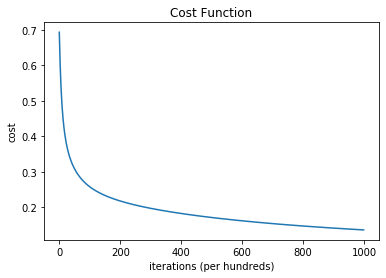

In [18]:
myModel.plotCosts()

Almost the same accuracy than with the sklearn method!